<a href="https://colab.research.google.com/github/NaraGuimma/Datathon_Eretz/blob/main/CloudWalk_Case.cloudwipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.1 - INDÚSTRIA DE PAGAMENTOS : Fluxos e atores envolvidos**







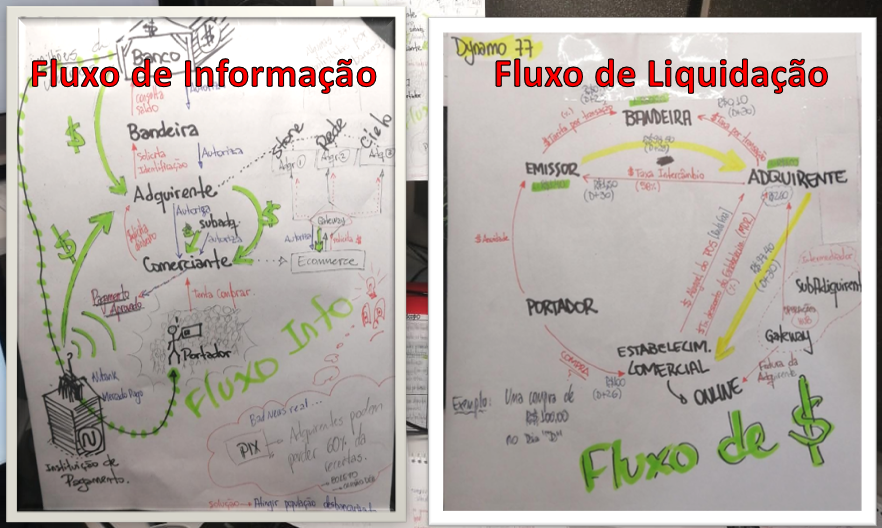

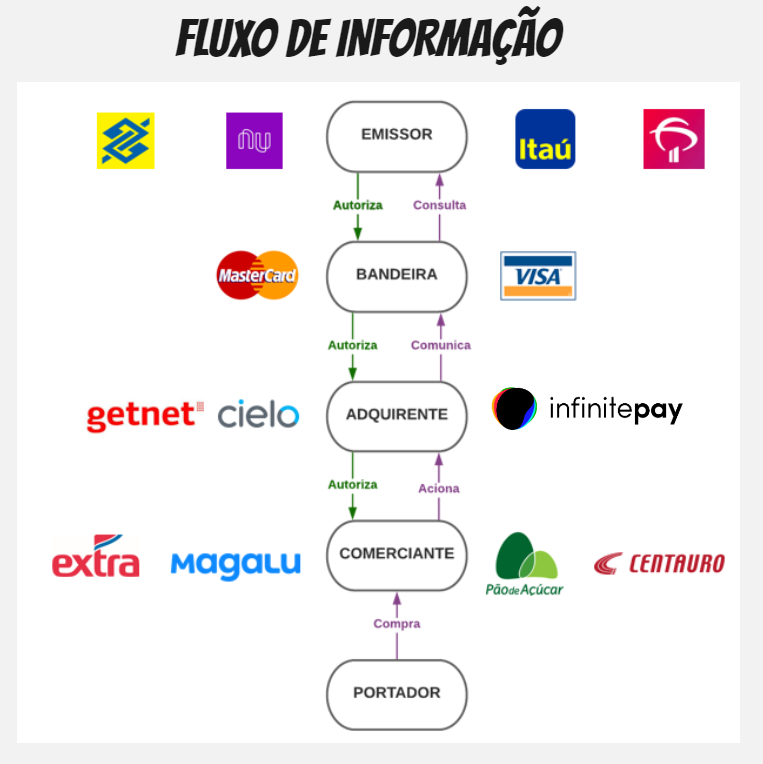

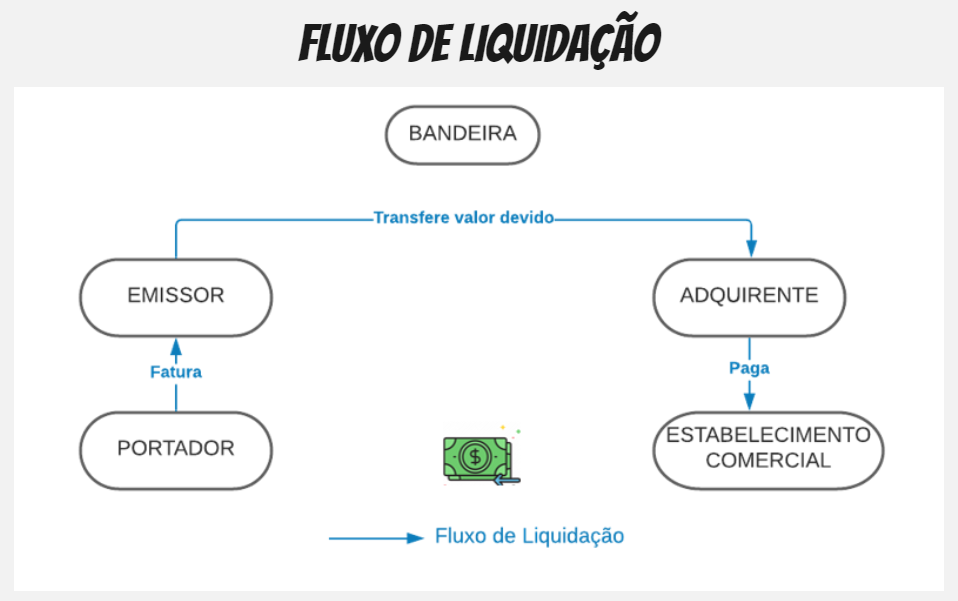

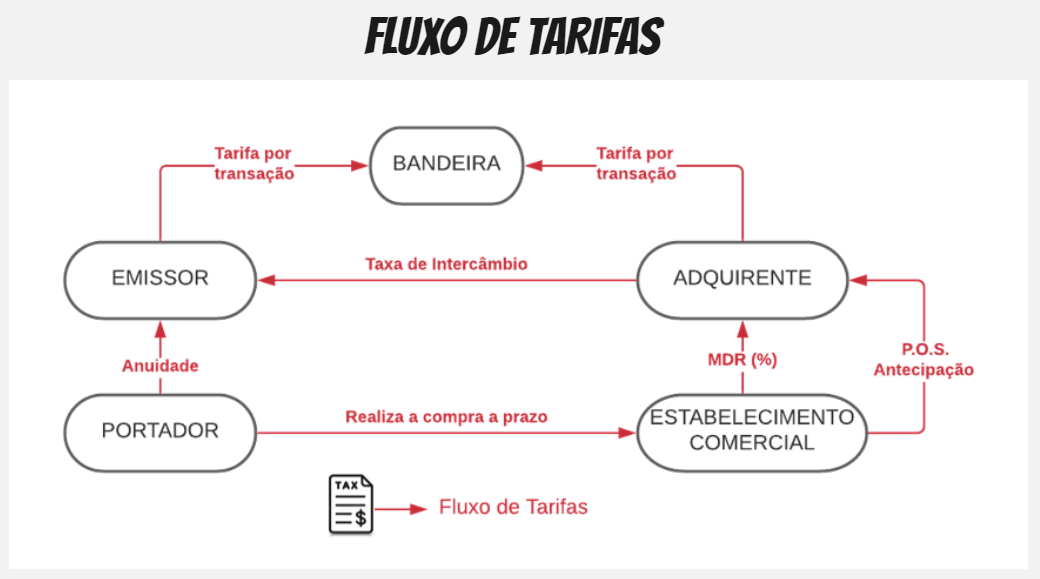

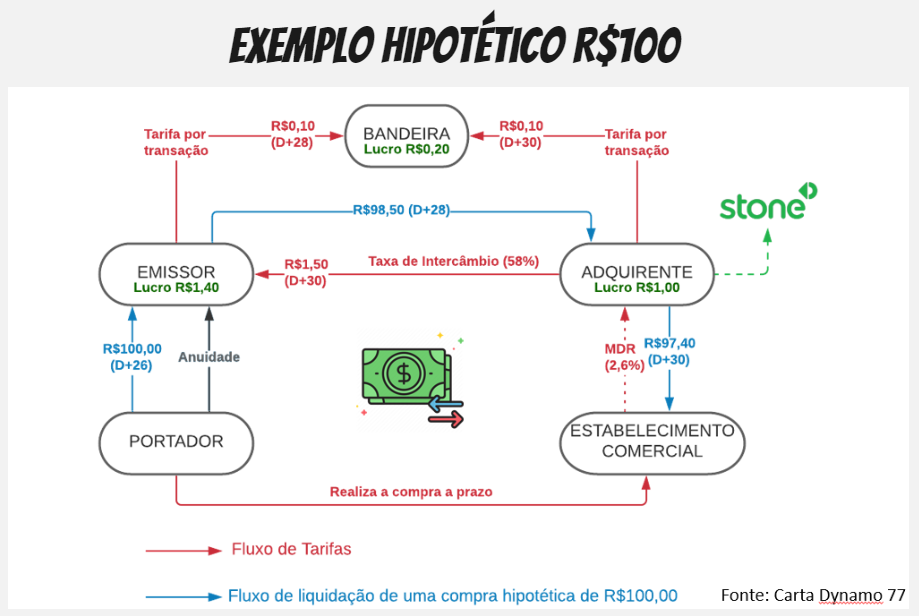

3.1.2]
 Explique a diferença entre adquirente, sub-adquirente e gateway de pagamentos. Como o fluxo anterior é diferente muda com esses atores?

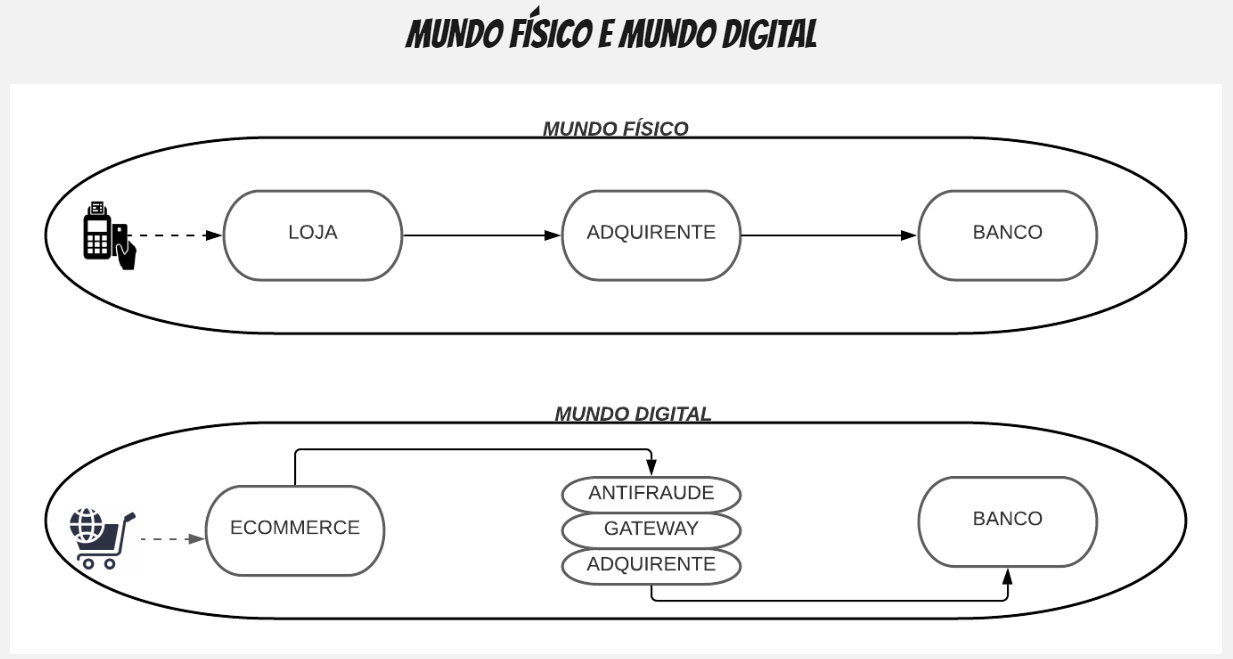

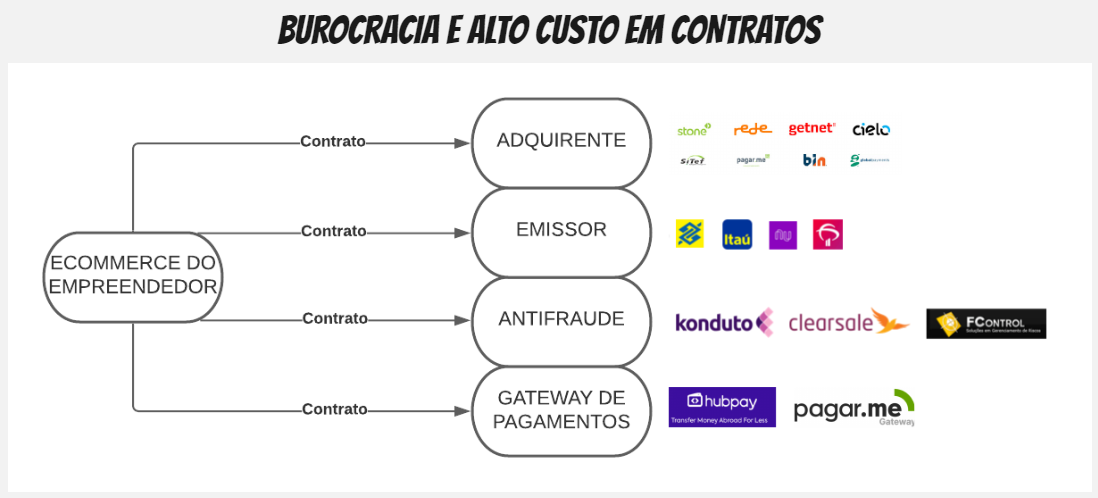

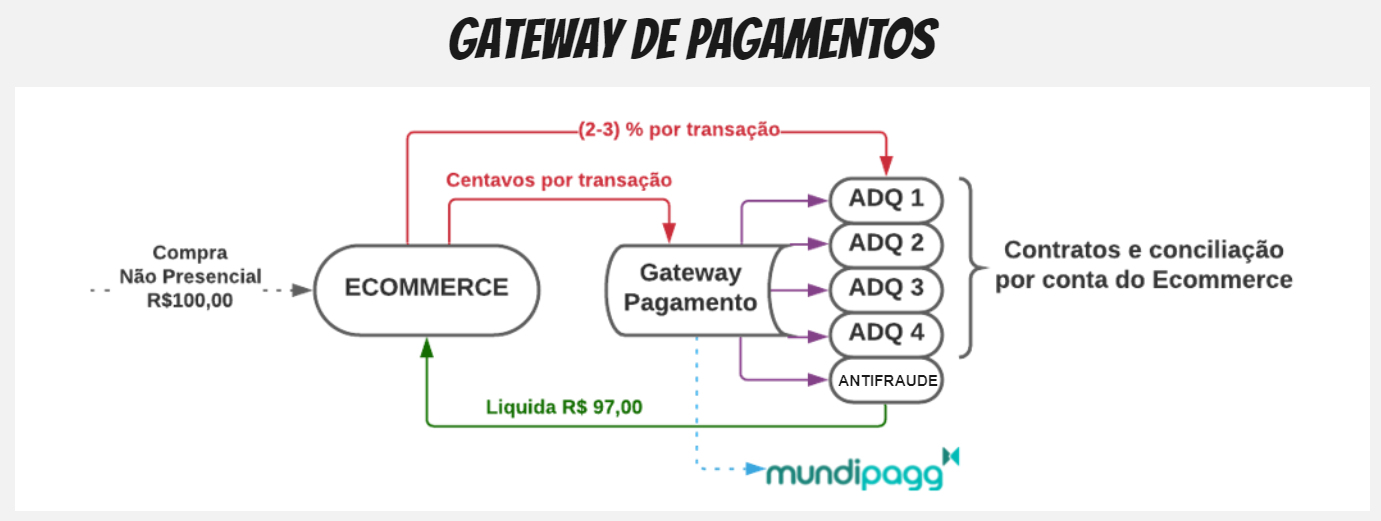

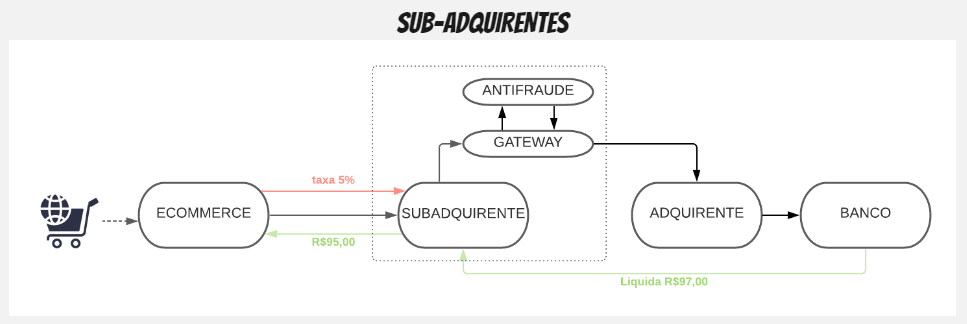

3.1.3] Explique o que é Chargeback, como se diferencia de cancelamentos e qual a conexão entre esses acontecimentos e as fraudes n no mundo da adquirência?

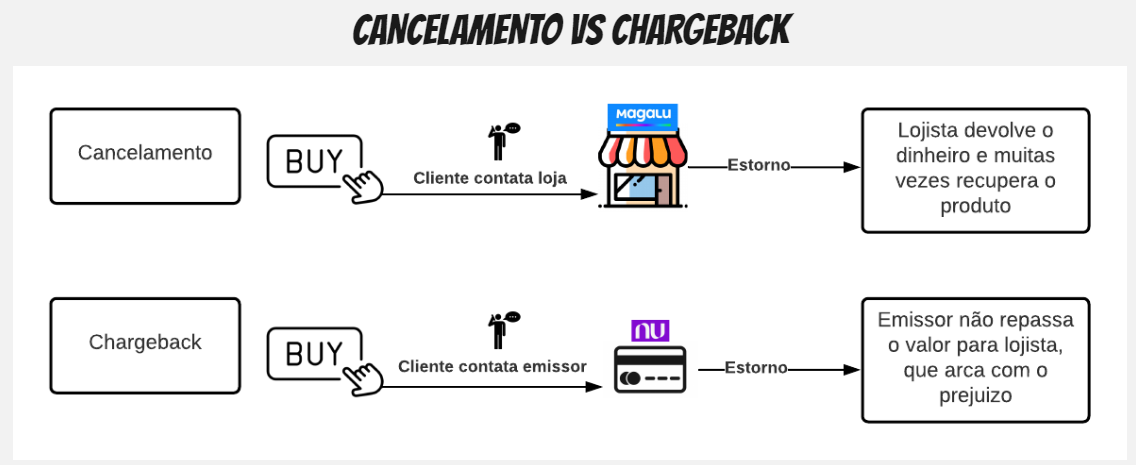

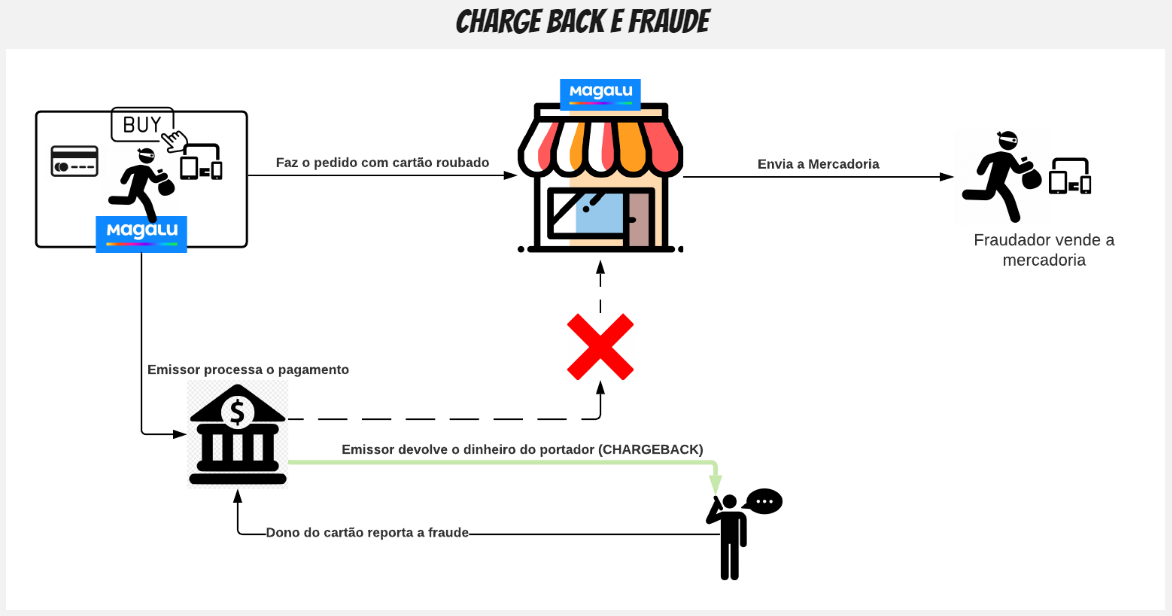

**3.2 - Exploratory Data Analisys**

Using this csv with hypothetical transactional data, imagine that you are trying to understand if there is any kind of suspicious behavior.

Analyze the data provided and present your conclusions (consider that all transactions are made using a mobile device).
In addition to the spreadsheet data, what other data would you look at to try to find patterns of possible frauds?

In [97]:
#libraries 

import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 



In [98]:
#data reading 
df = pd.read_csv('transactional-sample.csv')
df.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,False


In [99]:
#missing values verification 
df.isna().sum()

transaction_id          0
merchant_id             0
user_id                 0
card_number             0
transaction_date        0
transaction_amount      0
device_id             830
has_cbk                 0
dtype: int64

In [100]:
device_id_null_percentage = ((830/3199)*100)

print(f'We have in this dataset {device_id_null_percentage}% of reported null info in the device_id column. ')

We have in this dataset 25.94560800250078% of reported null info in the device_id column. 


In [101]:
#how to deal with 830 (25,94%) null devices id? this issue made me stop to think for a certain time about 
#the impact of replacing the null with some value or simply drop the missing values. it seems that 
#important data would be lost, so we'll replace it to 0 and be aware.

df['device_id'] = df['device_id'].fillna(0)
df.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,0.0,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,0.0,True
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,False


In [102]:
#for the sake of good model processing in the future, we will remove the * from 'card_number' column

df['card_number'] = df['card_number'].str.replace('*','')
df.head()
 



,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,4345059116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,4444564210,2019-12-01T22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,4258507024,2019-12-01T22:22:43.021495,760.36,0.0,False
3,21320401,68657,69758,4642963991,2019-12-01T21:59:19.797129,2556.13,0.0,True
4,21320402,54075,64367,6504876116,2019-12-01T21:30:53.347051,55.36,860232.0,False


In [103]:
#now we'll split the trasaction_date column in two others (transaction_day and transaction time)

df[['transaction_day', 'transaction_time']] = df['transaction_date'].str.split('T', expand=True)

df


,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,transaction_day,transaction_time
0,21320398,29744,97051,4345059116,2019-12-01T23:16:32.812632,374.56,285475.0,False,2019-12-01,23:16:32.812632
1,21320399,92895,2708,4444564210,2019-12-01T22:45:37.873639,734.87,497105.0,True,2019-12-01,22:45:37.873639
2,21320400,47759,14777,4258507024,2019-12-01T22:22:43.021495,760.36,0.0,False,2019-12-01,22:22:43.021495
3,21320401,68657,69758,4642963991,2019-12-01T21:59:19.797129,2556.13,0.0,True,2019-12-01,21:59:19.797129
4,21320402,54075,64367,6504876116,2019-12-01T21:30:53.347051,55.36,860232.0,False,2019-12-01,21:30:53.347051
...,...,...,...,...,...,...,...,...,...,...
3194,21323592,50493,49581,6504864139,2019-11-01T13:05:34.054967,744.15,0.0,False,2019-11-01,13:05:34.054967
3195,21323593,9603,59275,5280523611,2019-11-01T11:47:02.404963,1403.67,0.0,False,2019-11-01,11:47:02.404963
3196,21323594,57997,84486,5226889874,2019-11-01T10:23:50.555604,1.55,0.0,False,2019-11-01,10:23:50.555604
3197,21323595,35930,7,5443157773,2019-11-01T01:29:45.799767,359.68,0.0,False,2019-11-01,01:29:45.799767


In [104]:
#now we drop the transaction_date col 

df = df.drop(columns=['transaction_date'], axis=0)

df.head()



,transaction_id,merchant_id,user_id,card_number,transaction_amount,device_id,has_cbk,transaction_day,transaction_time
0,21320398,29744,97051,4345059116,374.56,285475.0,False,2019-12-01,23:16:32.812632
1,21320399,92895,2708,4444564210,734.87,497105.0,True,2019-12-01,22:45:37.873639
2,21320400,47759,14777,4258507024,760.36,0.0,False,2019-12-01,22:22:43.021495
3,21320401,68657,69758,4642963991,2556.13,0.0,True,2019-12-01,21:59:19.797129
4,21320402,54075,64367,6504876116,55.36,860232.0,False,2019-12-01,21:30:53.347051


In [105]:
#now we have to replace the '-' for '/' in the transaction_day columns

df['transaction_day'] = df['transaction_day'].str.replace('-','/')
df.head()


,transaction_id,merchant_id,user_id,card_number,transaction_amount,device_id,has_cbk,transaction_day,transaction_time
0,21320398,29744,97051,4345059116,374.56,285475.0,False,2019/12/01,23:16:32.812632
1,21320399,92895,2708,4444564210,734.87,497105.0,True,2019/12/01,22:45:37.873639
2,21320400,47759,14777,4258507024,760.36,0.0,False,2019/12/01,22:22:43.021495
3,21320401,68657,69758,4642963991,2556.13,0.0,True,2019/12/01,21:59:19.797129
4,21320402,54075,64367,6504876116,55.36,860232.0,False,2019/12/01,21:30:53.347051


In [140]:
#the target (has_cbk) col shows us the amout of transactions with chargeback. What's the current ratio? 
cbk_percentage = ((391/3199)*100)
cbk_percentage
print(f'We have in this dataset {cbk_percentage}% of reported chargeback data. ')

We have in this dataset 12.222569552985307% of reported chargeback data. 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


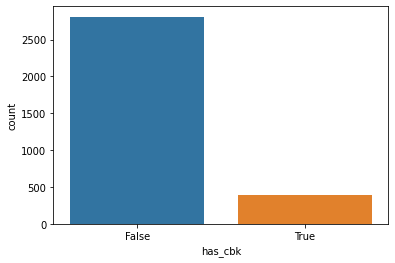

In [108]:
#we can plot to visualy compare the amount of cbk transactions
sns.countplot(df['has_cbk'])

In [109]:
#now that we know the amount of cbk, let's take a look into correlations

#cbk correlation

df.corr()['has_cbk'].sort_values(ascending=False)

has_cbk               1.000000
transaction_amount    0.287860
user_id               0.029590
device_id             0.018808
merchant_id          -0.025248
transaction_id       -0.132449
Name: has_cbk, dtype: float64

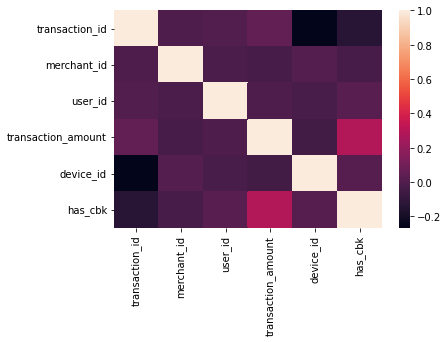

In [110]:
#heatmap corr visualization

sns.heatmap(df.corr())

In [111]:
#the reverse device_id correlation is affected by the zeros we insert in the df. the transaction_amount 
#seems to have more influence in the cbk numbers. 

df.head(50)

,transaction_id,merchant_id,user_id,card_number,transaction_amount,device_id,has_cbk,transaction_day,transaction_time
0,21320398,29744,97051,4345059116,374.56,285475.0,False,2019/12/01,23:16:32.812632
1,21320399,92895,2708,4444564210,734.87,497105.0,True,2019/12/01,22:45:37.873639
2,21320400,47759,14777,4258507024,760.36,0.0,False,2019/12/01,22:22:43.021495
3,21320401,68657,69758,4642963991,2556.13,0.0,True,2019/12/01,21:59:19.797129
4,21320402,54075,64367,6504876116,55.36,860232.0,False,2019/12/01,21:30:53.347051
5,21320403,59566,40759,5162928220,60.49,192705.0,False,2019/12/01,21:25:53.374213
6,21320404,20917,25661,6504859310,318.37,760932.0,False,2019/12/01,21:25:19.532243
7,21320405,56107,81152,6505169201,188.68,486.0,True,2019/12/01,21:24:05.608374
8,21320406,56107,81152,6505169201,352.77,486.0,True,2019/12/01,21:13:21.529999
9,21320407,56107,81152,6505169201,345.68,486.0,True,2019/12/01,21:04:55.066909


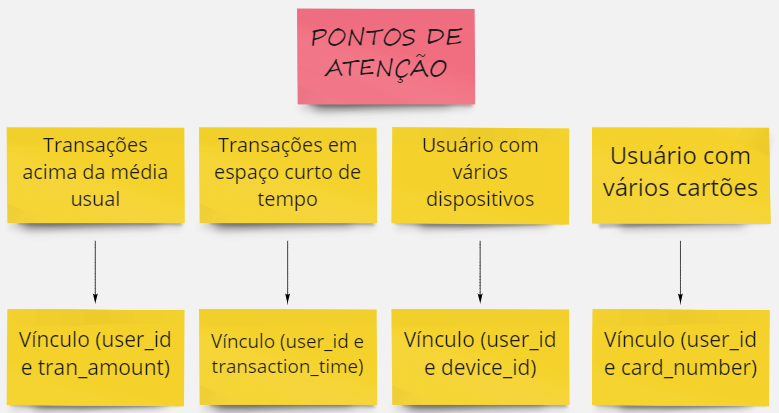

In [141]:
#how many times the transaction_amount repets?

df_amount = df['transaction_amount'].value_counts()

df_amount.head()

10.30     4
10.32     3
700.80    3
10.58     3
202.54    2
Name: transaction_amount, dtype: int64

In [113]:
#we have only 4 transaction in the whole dataset that were repeated more than 3 times. 
#these are strong canditates if made under the same merchand_id or card_number. let's check it out 

df_1030 = df.loc[(df['transaction_amount']) == 10.30]
df_1030.head()

,transaction_id,merchant_id,user_id,card_number,transaction_amount,device_id,has_cbk,transaction_day,transaction_time
1341,21321739,2895,82408,4984531451,10.3,680743.0,False,2019/11/24,00:56:02.834136
2112,21322510,63467,89492,5162929411,10.3,181823.0,False,2019/11/21,20:18:46.661299
2463,21322861,12561,50329,5502098301,10.3,528594.0,False,2019/11/18,14:15:09.543985
2517,21322915,91960,95161,5156017144,10.3,0.0,False,2019/11/17,18:54:17.382866


In [114]:
df_1032 = df.loc[(df['transaction_amount']) == 10.32]
df_1032.head()

,transaction_id,merchant_id,user_id,card_number,transaction_amount,device_id,has_cbk,transaction_day,transaction_time
2086,21322484,50563,11634,5316816694,10.32,444690.0,False,2019/11/21,21:11:27.275857
2993,21323391,77130,42677,5502091419,10.32,0.0,False,2019/11/07,22:09:14.359238
2995,21323393,86197,5798,5162929001,10.32,0.0,False,2019/11/07,21:47:54.286935


In [115]:
df_70080 = df.loc[(df['transaction_amount']) == 700.80]
df_70080.head()

,transaction_id,merchant_id,user_id,card_number,transaction_amount,device_id,has_cbk,transaction_day,transaction_time
369,21320767,72057,28518,4152755134,700.8,310277.0,False,2019/11/30,13:17:37.302766
1763,21322161,50839,93080,5447313051,700.8,174253.0,False,2019/11/22,20:44:01.446088
1912,21322310,71508,30907,5438829468,700.8,717628.0,False,2019/11/22,15:47:49.308140


In [116]:
df_1058 = df.loc[(df['transaction_amount']) == 10.58]
df_1058.head()

,transaction_id,merchant_id,user_id,card_number,transaction_amount,device_id,has_cbk,transaction_day,transaction_time
847,21321245,3643,63298,5447317430,10.58,631187.0,False,2019/11/28,20:09:01.359574
1899,21322297,51481,67953,5587639348,10.58,0.0,False,2019/11/22,16:10:40.422536
2232,21322630,82100,94446,5162925628,10.58,68677.0,False,2019/11/20,20:51:54.633711


In [117]:
#this hypotesis is wrong, because all these transactions were from different merchants and card numbers, so it seems safe. 

In [118]:
#how many user ids we have in the df? If we cross the user id with the device id, we are more likely to understand if they're using the same device or not 

df_cn = df['user_id'].value_counts()
df_cn.head(20)

11750    31
91637    22
79054    17
96025    14
78262    13
75710    10
56877     9
9853      9
11452     8
77959     7
7725      7
49106     7
7695      7
34548     6
17929     6
67519     6
21768     6
83722     6
3584      6
40779     6
Name: user_id, dtype: int64

In [119]:
#let's check out the card number of the user_id data that appeared most, so we can see if the person is using the same device and card number (which is expected)

df_user11750 = df.loc[(df['user_id']) == 11750]
df_user11750.head(31)

,transaction_id,merchant_id,user_id,card_number,transaction_amount,device_id,has_cbk,transaction_day,transaction_time
62,21320460,66876,11750,4532111392,687.57,342890.0,True,2019/12/01,16:43:09.730317
100,21320498,17275,11750,4532111531,674.23,342890.0,True,2019/12/01,14:02:31.156851
109,21320507,17275,11750,4532116820,657.38,342890.0,True,2019/12/01,13:36:54.525018
119,21320517,17275,11750,4532117094,639.87,342890.0,True,2019/12/01,12:21:42.647277
120,21320518,66876,11750,4532117322,555.53,342890.0,False,2019/12/01,12:09:19.012164
124,21320522,66876,11750,4532114482,607.45,342890.0,True,2019/12/01,11:39:51.107935
128,21320526,66876,11750,4532114310,638.35,342890.0,True,2019/12/01,11:06:28.287928
177,21320575,66876,11750,4532117546,508.91,342890.0,True,2019/11/30,21:36:50.372043
188,21320586,66876,11750,4532114433,648.94,342890.0,True,2019/11/30,20:51:38.313599
204,21320602,66876,11750,4532118177,649.30,342890.0,True,2019/11/30,19:57:18.098648


In [142]:
df_user11750['card_number'].value_counts()

4066559187    1
4066554017    1
4532117094    1
5365379148    1
4532117322    1
4532116820    1
4066558913    1
4532114180    1
4532114609    1
4152755122    1
4532118822    1
4984011451    1
5365375153    1
4066552518    1
4984016342    1
4532114310    1
4532117546    1
4532117385    1
4066559936    1
4532118177    1
4532114433    1
4532118930    1
4532111392    1
4532114482    1
5365375126    1
4532118383    1
5365377137    1
4984019945    1
4030025770    1
4532111531    1
6550035214    1
Name: card_number, dtype: int64

In [143]:
df_user11750['device_id'].value_counts()

342890.0    19
542535.0     7
670695.0     4
183458.0     1
Name: device_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


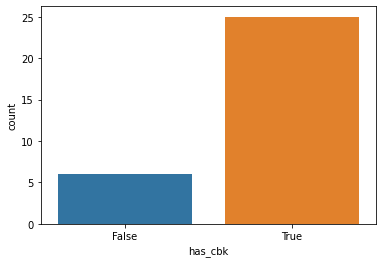

In [120]:
sns.countplot(df_user11750['has_cbk'])

In [121]:
df_user11750['has_cbk'].value_counts()

True     25
False     6
Name: has_cbk, dtype: int64


### **User 11750 has a high rate of fraudulent transactions (80,64%), by using four different devices and card numbers**


In [122]:
#now we'll check the user 91637
df_user91637 = df.loc[(df['user_id']) == 91637]
df_user91637.head(22)

,transaction_id,merchant_id,user_id,card_number,transaction_amount,device_id,has_cbk,transaction_day,transaction_time
740,21321138,4705,91637,4066557631,930.60,563499.0,True,2019/11/29,01:20:14.182107
751,21321149,4705,91637,4901721626,1061.15,563499.0,True,2019/11/29,00:13:31.902951
757,21321155,4705,91637,4893916735,820.34,563499.0,True,2019/11/29,00:01:30.355033
782,21321180,4705,91637,4066552189,691.03,563499.0,True,2019/11/28,23:03:01.871808
1087,21321485,4705,91637,5155908688,663.46,563499.0,False,2019/11/27,17:32:06.437271
1088,21321486,4705,91637,5155903621,563.55,563499.0,True,2019/11/27,17:21:43.309868
1096,21321494,4705,91637,5155904661,787.10,563499.0,True,2019/11/27,15:56:20.736219
1135,21321533,4705,91637,5549068297,1416.70,563499.0,True,2019/11/26,22:50:59.101779
1141,21321539,4705,91637,5549277403,824.02,563499.0,True,2019/11/26,21:51:30.838811
1144,21321542,4705,91637,5549065829,550.05,563499.0,False,2019/11/26,21:28:54.073914


In [144]:
df_user91637['card_number'].value_counts()

4066557631    1
5300343802    1
5549068297    1
5300338354    1
5300344416    1
4984014982    1
4960451160    1
4893916735    1
5549277403    1
4152747114    1
5300333319    1
5587637319    1
4066552189    1
5549065829    1
4901721626    1
5155903621    1
5155904661    1
5300333010    1
5155908688    1
5300336050    1
4152747113    1
5300339840    1
Name: card_number, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


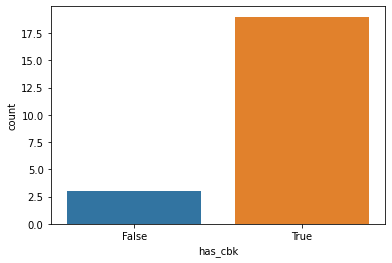

In [123]:
sns.countplot(df_user91637['has_cbk'])

In [124]:
df_user91637['has_cbk'].value_counts()

True     19
False     3
Name: has_cbk, dtype: int64

### In the same logic, user 91637 has a high rate of fraudulent transactions (86.36%), but this time with all in the same merchant id and a several different card numbers ###

In [125]:
df_user79054 = df.loc[(df['user_id']) == 79054]
df_user79054.head(17)

,transaction_id,merchant_id,user_id,card_number,transaction_amount,device_id,has_cbk,transaction_day,transaction_time
692,21321090,1308,79054,4066557343,2231.98,101848.0,True,2019/11/29,12:51:17.927921
705,21321103,1308,79054,4066557948,2183.76,101848.0,True,2019/11/29,11:49:14.553339
708,21321106,1308,79054,4066555169,2251.02,101848.0,True,2019/11/29,11:40:49.445144
727,21321125,1308,79054,4066555763,1834.09,101848.0,True,2019/11/29,02:58:04.351521
728,21321126,1308,79054,4066557948,2019.47,101848.0,True,2019/11/29,02:52:00.400886
749,21321147,36617,79054,4066557948,2996.41,101848.0,True,2019/11/29,00:15:13.398376
755,21321153,36617,79054,4066554572,2971.56,101848.0,True,2019/11/29,00:04:17.161939
760,21321158,36617,79054,4066556040,1605.10,101848.0,True,2019/11/28,23:55:13.780905
776,21321174,36617,79054,4066556347,469.97,101848.0,True,2019/11/28,23:22:43.750471
798,21321196,18267,79054,4066551129,2022.18,101848.0,True,2019/11/28,21:56:32.930827


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


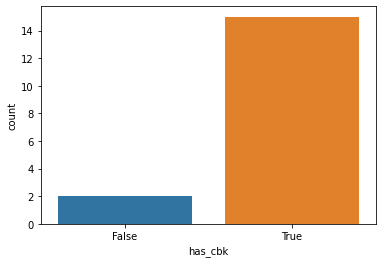

In [126]:
sns.countplot(df_user79054['has_cbk'])

In [127]:
df_user79054['has_cbk'].value_counts()

True     15
False     2
Name: has_cbk, dtype: int64

In [128]:
#let't check the mean value of all transactions

df['transaction_amount'].mean()



767.8129040325081

### In the same logic, user 91637 has a high rate of fraudulent transactions (88.23%), but this time with all high value transactions, above the dataframe mean value except for one ID:21321174 ###

In [129]:
df_user96025 = df.loc[(df['user_id']) == 96025]
df_user96025.head(14
                  )

,transaction_id,merchant_id,user_id,card_number,transaction_amount,device_id,has_cbk,transaction_day,transaction_time
565,21320963,1308,96025,4066554980,2141.93,438940.0,True,2019/11/29,17:49:01.844537
569,21320967,1308,96025,4066557343,2259.99,438940.0,True,2019/11/29,17:42:40.460221
596,21320994,1308,96025,4066557343,2288.47,438940.0,True,2019/11/29,16:46:59.421700
603,21321001,1308,96025,4066554980,2261.25,438940.0,True,2019/11/29,16:36:00.073092
709,21321107,1308,96025,4066555764,2412.28,438940.0,True,2019/11/29,11:32:14.313926
723,21321121,1308,96025,4066555764,2486.70,438940.0,True,2019/11/29,03:30:43.934091
724,21321122,1308,96025,4066554572,1648.30,438940.0,True,2019/11/29,03:17:30.558440
729,21321127,1308,96025,4066555764,2774.51,438940.0,True,2019/11/29,02:35:55.206318
731,21321129,1308,96025,4066554608,2819.59,438940.0,True,2019/11/29,02:10:25.828340
734,21321132,1308,96025,4066555763,2904.60,438940.0,True,2019/11/29,02:02:30.874661


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


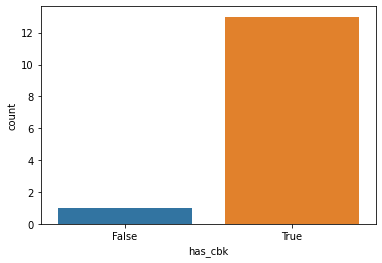

In [130]:
sns.countplot(df_user96025['has_cbk'])


In [131]:
df_user96025['has_cbk'].value_counts()

True     13
False     1
Name: has_cbk, dtype: int64

### In the same logic, user 96025 has a high rate of fraudulent transactions (88.23%), but this time with all of the cbk ones way above the mean value. 

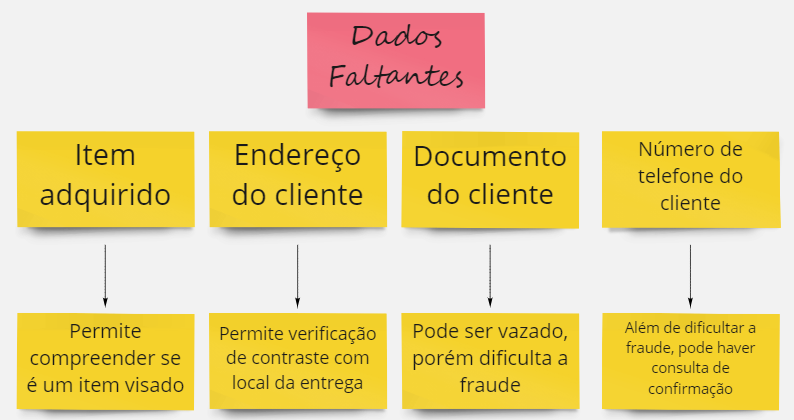

**3.3 Anti-fraud model attempt**

Stop credit card fraud: Implement the concept of a simple anti-fraud.

An Anti-fraud works by receiving information about a transaction and inferring whether it is a fraudulent transaction or not before authorizing it. We work mostly with Ruby and Python, but you can use any programming language that you want.

Please use the data provided on challenge 2 to test your solution. Consider that transactions with the flag has_cbk = true are transactions with fraud chargebacks.




In [132]:
#importando as bibliotecas necessárias

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [133]:
#train (70%) and test (30%) data split

X = df.drop(['has_cbk', 'transaction_day', 'transaction_time'], axis=1)
y = df['has_cbk']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 7)

In [134]:
#instantiate the model

model = RandomForestClassifier()


In [135]:
#train the model with the train data

model = model.fit(X_train, y_train)


In [136]:
#test the model 

y_predict = model.predict(X_val)

In [137]:
#now that we have trained and tested our model, we will create a template with the real data and the model's prediction

template = pd.DataFrame({'has_cbk' : y_val, 'model_prediction': y_predict})
template





,has_cbk,model_prediction
2943,True,True
3038,False,False
2931,True,True
1489,False,False
121,False,False
...,...,...
1275,False,False
2335,False,False
2781,False,False
2264,False,False


In [138]:
#Classification to evaluate the model 
print('Classificaton Metrics: \n', classification_report(y_val, y_predict))

Classificaton Metrics: 
               precision    recall  f1-score   support

       False       0.94      0.99      0.96       841
        True       0.84      0.53      0.65       119

    accuracy                           0.93       960
   macro avg       0.89      0.76      0.81       960
weighted avg       0.92      0.93      0.92       960

